In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None)

In [ ]:
model.summary()
# 最後の(None, 1000)は1000クラス分類であることを示す。
# Noneは入力サンプル数（入力バッチ数）が決まってないことを意味する。

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

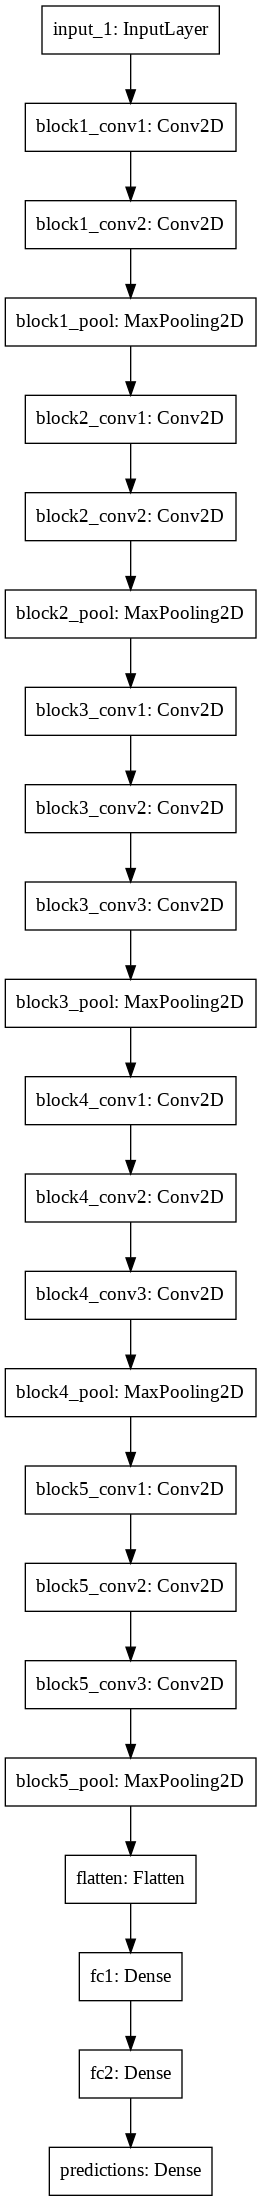

In [ ]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model).create(prog='dot', format='png'))

In [ ]:
#自分で画像を入力し、学習済みのVGG16にクラスの予測をさせる
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import glob
import os
import shutil

# 学習済みのVGG16をロード
# 構造とともに学習済みの重みも読み込まれる
model = VGG16(weights='imagenet')

predicting_dirname = "dataset/predicting/*"
predicted_dirname = "dataset/predicted"
for i, file in enumerate(glob.glob(predicting_dirname)):
    #image =load_img(file, target_size=(224, 224))
    image =load_img(file).resize((224, 224))
    x = img_to_array(image)
    x = np.expand_dims(x, axis=0)
    preds = model.predict(preprocess_input(x))
    results = decode_predictions(preds, top=1)[0]
    result = results[0]
    prob = result[2] * 100
    id = result[0]
    print(i,result)
    
    if (prob >= 80) & (id == 'n01644373'):
      shutil.copy(file, predicted_dirname)

40960/35363 [==================================] - 0s 0us/step
0 ('n01644373', 'tree_frog', 0.79769224)
1 ('n03868863', 'oxygen_mask', 0.21720247)
2 ('n07565083', 'menu', 0.21224698)
3 ('n03476684', 'hair_slide', 0.13491365)
4 ('n04443257', 'tobacco_shop', 0.05284317)
5 ('n07714990', 'broccoli', 0.397585)
6 ('n01644900', 'tailed_frog', 0.66609937)
7 ('n01644373', 'tree_frog', 0.53845525)
8 ('n01644373', 'tree_frog', 0.40953192)
9 ('n01644373', 'tree_frog', 0.4448169)
10 ('n07565083', 'menu', 0.1011178)
11 ('n03794056', 'mousetrap', 0.11898875)
12 ('n01694178', 'African_chameleon', 0.6332575)
13 ('n03868242', 'oxcart', 0.18305019)
14 ('n01644373', 'tree_frog', 0.94290066)
15 ('n01644373', 'tree_frog', 0.77984583)
16 ('n03291819', 'envelope', 0.27372476)
17 ('n01644900', 'tailed_frog', 0.5942273)
18 ('n01641577', 'bullfrog', 0.92158777)
19 ('n03595614', 'jersey', 0.09975006)
20 ('n03314780', 'face_powder', 0.04632164)
21 ('n04399382', 'teddy', 0.092643365)
22 ('n04579432', 'whistle', 0.1